In [11]:
using FileIO
using Images, ImageView
using Colors
using Formatting
using FFTW
using Plots

In [2]:
function idealFilter(r, isLow, threshold)
  if isLow
    r .<= threshold
  else
    r .> threshold
  end
end

function gaussianFilter(r, isLow, threshold)
  if isLow
    exp.(-(r.^2) ./ 2*(threshold^2))
  else
    1 .- exp.(-(r.^2) ./ 2*(threshold^2))
  end
end

function butterworthFilter(r, isLow, threshold, n)
  if isLow
    1 ./ (1 .+ (r ./ threshold) .^ (2 * n))
  else
    1 ./ (1 .+ (threshold ./ r) .^ (2 * n))
  end
end

function laplacianFilter(r, isLow, threshold)
  -r.^2
end

function filterFactory(name, shape, isLow, threshold, other)
  n, m = shape
  r = sqrt.([i^2 + j^2 for i=-n/2:n/2-1, j=-m/2:m/2-1])

  if name == "Ideal"
    idealFilter(r, isLow, threshold)
  elseif name == "Gaussian"
    gaussianFilter(r, isLow, threshold)
  elseif name == "Butterworth"
    butterworthFilter(r, isLow, threshold, other)
  elseif name == "Laplacian"
    laplacianFilter(r, isLow, threshold)
  else
    error("Filter not found")
  end
end

filterFactory (generic function with 1 method)

In [13]:
imagePath = "../images/f124074.jpg"
filterName = "Ideal"
filterLow = true
filterThreshold = 30
filterOther = 0

img = load(imagePath)
img_gray = Float32.(Gray.(img))
filter = filterFactory(filterName, size(img_gray), filterLow, filterThreshold, filterOther)
img_fft = fftshift(fft(img_gray))
out = abs.(real.(ifft(img_fft .* filter)))

720×1280 Array{Float32,2}:
 0.125623   0.133808   0.142699   …  0.105667   0.111525   0.118184 
 0.120721   0.127849   0.135616      0.103504   0.108524   0.114269 
 0.115489   0.121567   0.12822       0.100998   0.105183   0.110019 
 0.110158   0.115214   0.120783      0.0983235  0.101694   0.105643 
 0.104962   0.109044   0.113579      0.0956583  0.0982531  0.101358 
 0.100126   0.103299   0.10687    …  0.0931787  0.0950526  0.0973715
 0.0958562  0.0982011  0.10089       0.0910495  0.0922702  0.0938749
 0.092331   0.0939393  0.0958441     0.0894156  0.0900616  0.091035 
 0.0896915  0.0906639  0.0918893     0.0883944  0.0885514  0.0889848
 0.0880352  0.0884776  0.0891341     0.0880694  0.0878278  0.0878168
 0.0874112  0.0874311  0.0876312  …  0.0884856  0.0879368  0.0875786
 0.0878176  0.0875212  0.0873754     0.0896464  0.0888801  0.0882699
 0.0892011  0.0886895  0.0883038     0.0915127  0.0906137  0.0898423
 ⋮                                ⋱                                 
 0.1106

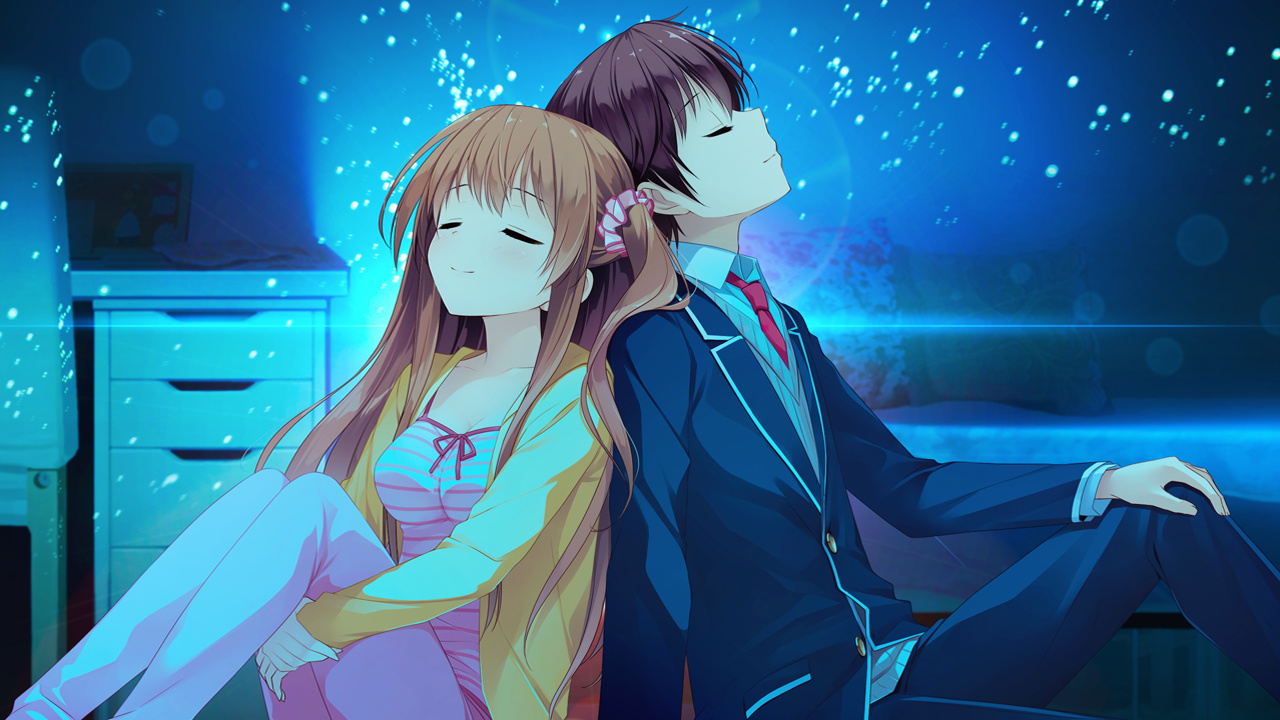

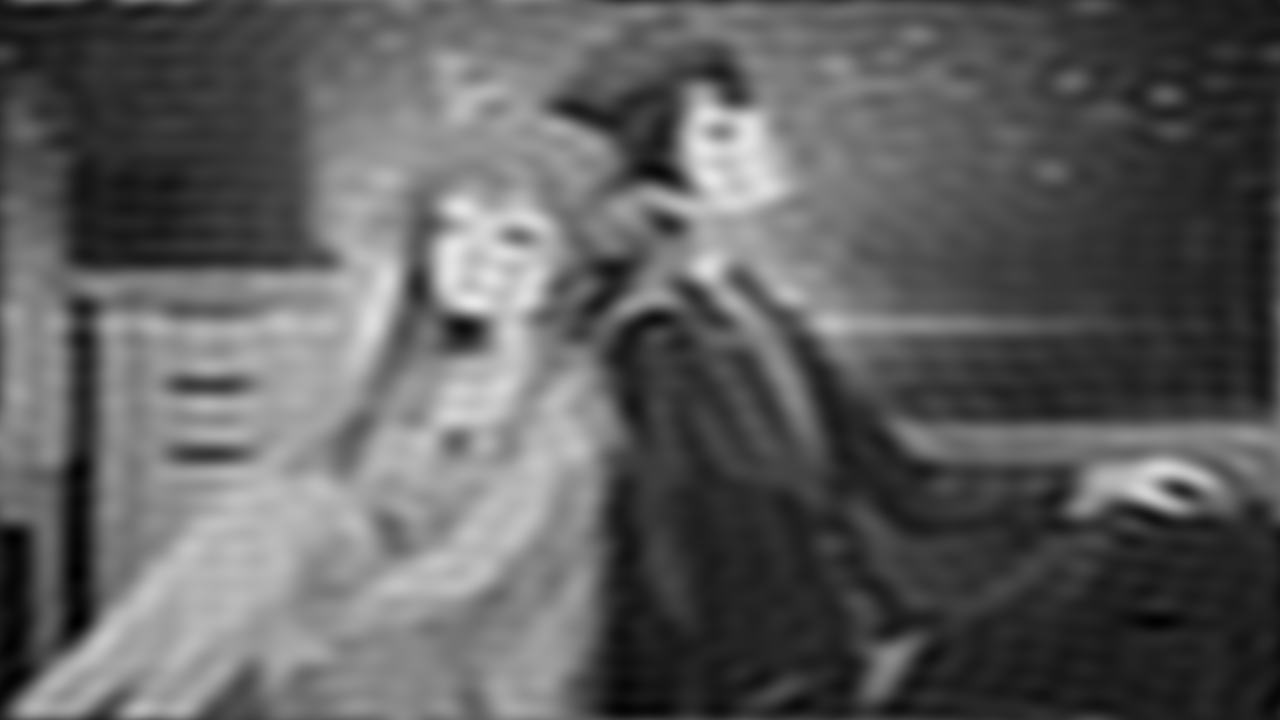

In [18]:
display(img)
display(Gray.(out))